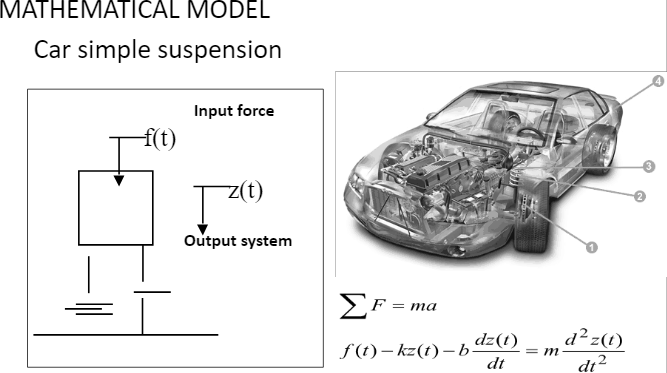

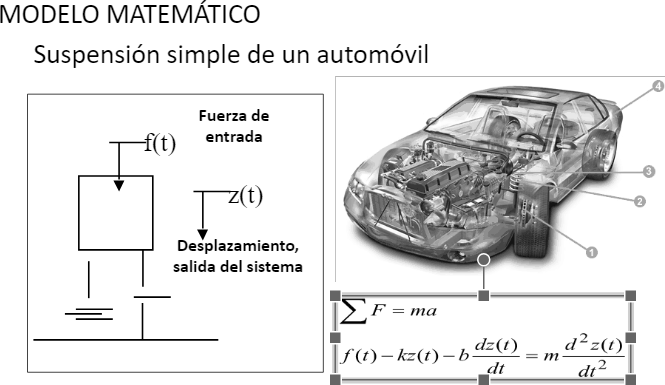

y1
-((2*t - 4.0)*exp(t/20) - 0.532120023854438*sqrt(79)*sin(sqrt(79)*(t - 1.5)/20) + 1.07788415088463*cos(sqrt(79)*(t - 1.5)/20))*exp(-t/20)*Heaviside(t - 1.5)/2


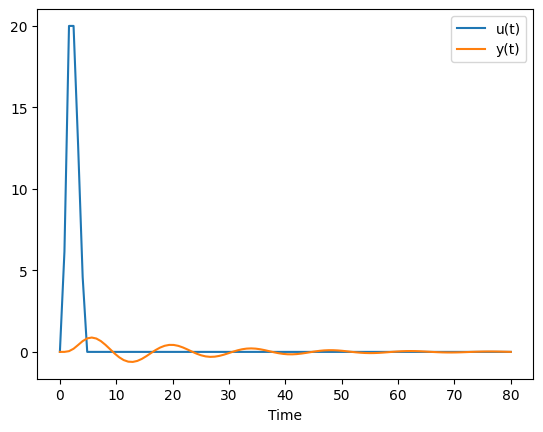

In [1]:
# Standard libraries
import numpy as np
import matplotlib.pyplot as plt

# Laplace library
import sympy as sym
from sympy.abc import s,t,x,y,z
from sympy.integrals import inverse_laplace_transform

# Define speed bump
#  Ramp (up) starts at .5 s
U0 = 20/s**2*sym.exp(-.5*s)
# Ramp completes at 1.5 s
U1 = -20/s**2*sym.exp(-1.5*s)
# Ramp (down) starts at 2.5 s
U2 = -10/s**2*sym.exp(-2.5*s)
# Ramp finish at 4.5 s
U3 = 10/s**2*sym.exp(-4.5*s)

# Transfer function
m = 100
b = 10
k = 20
G = 1/(m*s*s+b*s+k)

# Calculate responses
Y0 = G * U0
Y1 = G * U1
Y2 = G * U2
Y3 = G * U3

# Inverse Laplace Transform
u0 = inverse_laplace_transform(U0,s,t)
u1 = inverse_laplace_transform(U1,s,t)
u2 = inverse_laplace_transform(U2,s,t)
u3 = inverse_laplace_transform(U3,s,t)
y0 = inverse_laplace_transform(Y0,s,t)
y1 = inverse_laplace_transform(Y1,s,t)
y2 = inverse_laplace_transform(Y2,s,t)
y3 = inverse_laplace_transform(Y3,s,t)
print('y1')
print(y1)

# Data and plot
tm = np.linspace(0,80,100)
us = np.zeros(len(tm))
ys = np.zeros(len(tm))

# Numeric values for u and y
for u in [u0,u1,u2,u3]:
    for i in range(len(tm)):
        us[i] += u.subs(t,tm[i])
for y in [y0,y1,y2,y3]:
    for i in range(len(tm)):
        ys[i] += y.subs(t,tm[i])

# Plot
plt.figure()
plt.plot(tm,us,label='u(t) - speed bump')
plt.plot(tm,ys,label='y(t) - simple suspension')
plt.legend()
plt.xlabel('Time')
plt.show()